# Ford GoBike Insight Presentation

## By (Ogunseye Ibukunoluwa)

## Investigation Overview


> The overall goal of this presentation is to communicate the findings derived from the analysis of the dataset. The presentation would help the clients understand their users, where they are, and how they are using their services.With this, they will be able to make informed managerial decisions to improve their service features and delivery strategies.

> The main insight for the presentation is exploring the user behaviors.
> 1. I look at the categories of people who predominantly use the ride service
> This is done by exploring the user types, and the demographics of the users
> 2. I will then assess if there are any key differences between these different user categories in terms of frequency of rides and the duration.
> This would be done by exploring the different relationships between each user category against the frequency and duration of rides.
> Finally, to further streamline the user type exploration, we would use the station with the highest frequencies, suppport our exploration to trace where most of the users work or live.


## Dataset Overview

> The data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.patches import Patch
plt.style.use('fivethirtyeight')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
Data = pd.read_csv('C:/Users/gameon/Downloads/Data_Clean.csv')
Data.head()


,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Start_Day,Duration_Minutes,Age,Start_Hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thursday,869.750000,38.0,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thursday,1030.900000,50.0,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,Thursday,608.166667,33.0,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,Thursday,26.416667,48.0,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,Thursday,29.883333,63.0,23


> Some Data Wrangling was carried out on the data in the exploratory part of this project, so we would simply continue with our presentation from the cleaned Data.

## 1. Distribution of Trips between Genders

> Almost 75% of those taking rides are Males

([<matplotlib.patches.Wedge at 0x1436328>,
 [Text(-0.8375795042612981, 0.8593372877057053, 'Male'),
  Text(0.7795473161548458, -0.9123080520722028, 'Female'),
  Text(1.1974276490631655, -0.07853040977265324, 'Other')],
 [Text(-0.4885880441524239, 0.5012800844949947, '74.6%'),
  Text(0.45473593442366, -0.5321796970421182, '23.3%'),
  Text(0.6984994619535132, -0.04580940570071439, '2.1%')])

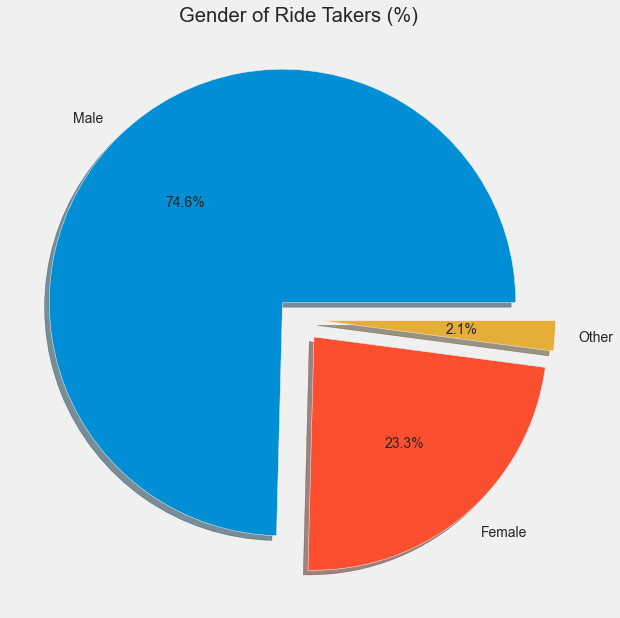

In [3]:
plt.figure(figsize=[10,10])
plt.title('Gender of Ride Takers (%)')
sample=Data['member_gender'].value_counts()
explodepie = [0.1, 0.1,0.1]
plt.pie(sample, labels = sample.index, autopct='%1.1f%%', explode=explodepie, shadow=True)

## 2. Distribution of Rides among the different Age Demographic of Users.

> The Data shows that most of the people who take the ride are at least between Ages 30 - 40 while a larger percentage are around ages 30 - 33 years

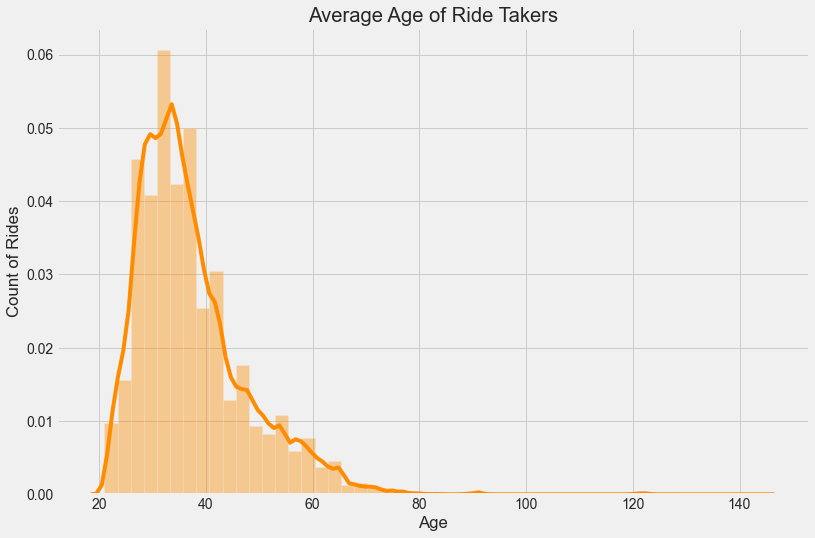

In [4]:
plt.figure(figsize=[12,8])
plt.title('Average Age of Ride Takers')
plt.xlabel('Age of Ride Takers (years)')
plt.ylabel('Count of Rides')
sns.distplot(Data['Age'], hist=True, color='darkorange')

## 3. Distribution of Rides between the User Types


> About 90% of the users are subscribers while 10% are yet to subscribe.


([<matplotlib.patches.Wedge at 0xa38c328>,
 [Text(-1.1472960004002337, 0.35172700701769705, 'Subscriber'),
  Text(1.1472959921674686, -0.3517270338720983, 'Customer')],
 [Text(-0.6692560002334695, 0.20517408742698995, '90.5%'),
  Text(0.6692559954310232, -0.2051741030920573, '9.5%')])

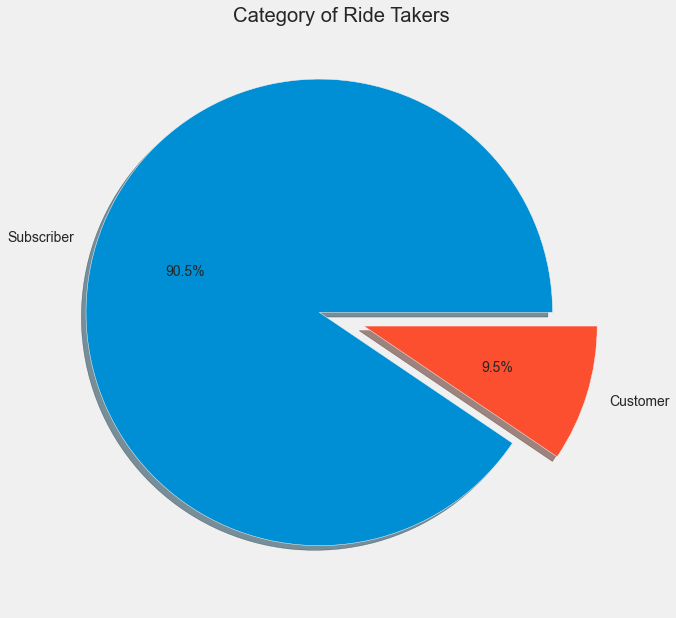

In [5]:
plt.figure(figsize=[10,10])
plt.title('Category of Ride Takers')
sample=Data['user_type'].value_counts()
explodepie = [0.1, 0.1]
plt.pie(sample, labels = sample.index, autopct='%1.1f%%', explode=explodepie, shadow=True)

## 4. Distributions of Ride Locations for all Users

> San Francisco Caltrain Station 2 and Market Street appear to have the highest frequencies of rides which depicts the locations of most users.

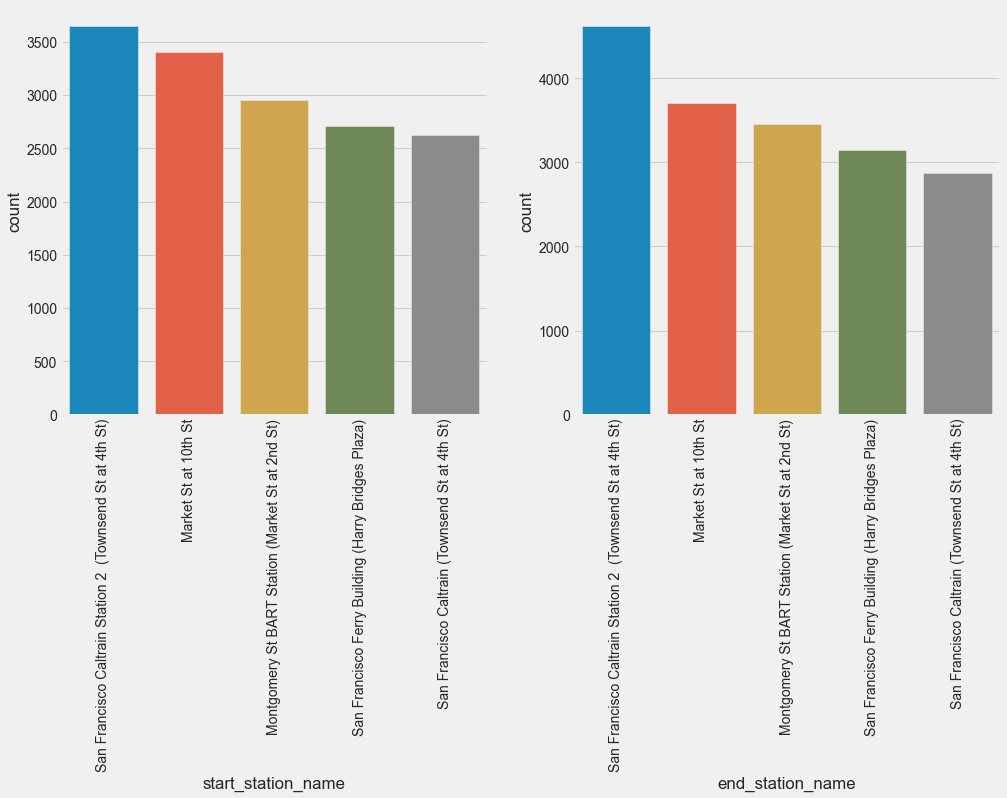

In [6]:
cat_order = Data['end_station_name'].value_counts().index[:5]
cat_order_1 = Data['start_station_name'].value_counts().index[:5]


fig, ax = plt.subplots(1,2, figsize=(15,7), sharex=True)
ax[0].tick_params(axis='x', rotation=90)
ax[1].tick_params(axis='x', rotation=90)
sns.countplot(data = Data, x = 'start_station_name', order = cat_order_1, ax=ax[0])
sns.countplot(data = Data, x = 'end_station_name', order = cat_order, ax=ax[1])
fig.show()